# **Simpler models for class prediction**

In [13]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, TensorDataset, DataLoader
from collections import Counter

# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Logistic Regression

---





In [79]:
X_train = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_train.csv")
y_train = X_train["class"]

X_test = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_test.csv")
y_test = X_test["class"]

X_train.drop("class", axis=1, inplace=True)
X_train.replace([-np.inf, np.inf], 2**30, inplace = True)
X_test.drop("class", axis=1, inplace=True)
X_test.replace([-np.inf, np.inf], 2**30, inplace = True)

In [80]:
model_LR = LogisticRegression(C = 0.15, multi_class="multinomial",solver="newton-cg", max_iter=1000, penalty='l2')

Standarizing data (mean = 0 and var = 1)

In [81]:
pipe = make_pipeline(preprocessing.StandardScaler(), model_LR)
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=0.15, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [82]:
print("TRAIN: ", str(pipe.score(X_train, y_train)))
print("TEST: ", str(pipe.score(X_test, y_test)))

TRAIN:  0.8235294117647058
TEST:  0.734375


In [83]:
predictions = pipe.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())

[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 1, 5, 4, 5, 5, 4, 4, 1, 4]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]


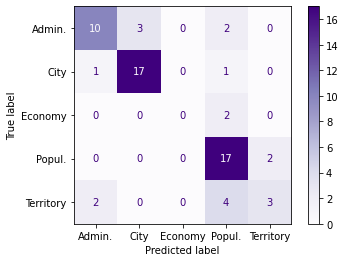

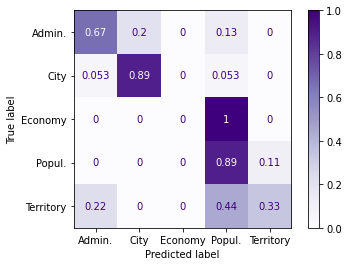

In [84]:
title = [("MLP Confusion Matrix", None),
         ("MLP Normalized Confusion Matrix", 'true')]
class_names = ['Admin.', 'City', 'Economy','Popul.', 'Territory']
for title, normalize in title:
  cm = confusion_matrix(y_test, predictions, normalize = normalize)
  cmd = ConfusionMatrixDisplay(cm, display_labels= ['Admin.', 'City', 'Economy','Popul.', 'Territory'])
  cmd.plot(cmap = plt.cm.Purples)

# Random Forest


---



In [85]:
X_train = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_train.csv")
y_train = X_train["class"]

X_test = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_test.csv")
y_test = X_test["class"]

X_train.drop("class", axis=1, inplace=True)
X_train.replace([-np.inf, np.inf], 2**30, inplace = True)
X_test.drop("class", axis=1, inplace=True)
X_test.replace([-np.inf, np.inf], 2**30, inplace = True)

In [86]:
model_RF = RandomForestClassifier(max_depth=10,n_estimators=100, random_state=0, max_features = "sqrt")

In [87]:
pipe = make_pipeline(preprocessing.StandardScaler(), model_RF)
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [88]:
print("TRAIN: ", str(pipe.score(X_train, y_train)))
print("TEST: ", str(pipe.score(X_test, y_test)))

TRAIN:  1.0
TEST:  0.875


In [89]:
predictions = pipe.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 5, 5, 5, 5, 5, 1, 2, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]


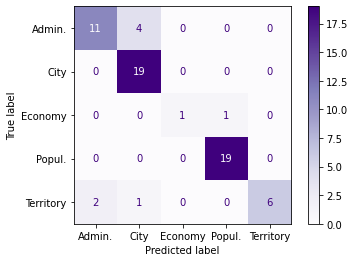

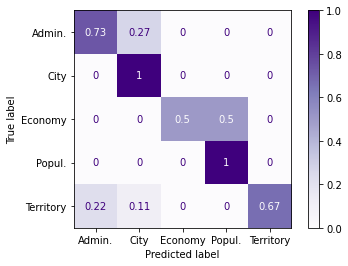

In [90]:
title = [("MLP Confusion Matrix", None),
         ("MLP Normalized Confusion Matrix", 'true')]
class_names = ['Admin.', 'City', 'Economy','Popul.', 'Territory']
for title, normalize in title:
  cm = confusion_matrix(y_test, predictions, normalize = normalize)
  cmd = ConfusionMatrixDisplay(cm, display_labels= ['Admin.', 'City', 'Economy','Popul.', 'Territory'])
  cmd.plot(cmap = plt.cm.Purples)

# Support Vector Machines



---



In [91]:
X_train = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_train.csv")
y_train = X_train["class"]

X_test = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_test.csv")
y_test = X_test["class"]

X_train.drop("class", axis=1, inplace=True)
X_train.replace([-np.inf, np.inf], 2**30, inplace = True)
X_test.drop("class", axis=1, inplace=True)
X_test.replace([-np.inf, np.inf], 2**30, inplace = True)

In [92]:
model_SVMs = SVC(decision_function_shape = 'ovo', C=150,kernel = 'linear', shrinking = False, probability = True)

In [93]:
pipe = make_pipeline(preprocessing.StandardScaler(), model_SVMs)
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=150, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=False,
                     tol=0.001, verbose=False))],
         verbose=False)

In [94]:
print("TRAIN: ", str(pipe.score(X_train, y_train)))
print("TEST: ", str(pipe.score(X_test, y_test)))

TRAIN:  0.9882352941176471
TEST:  0.71875


In [95]:
predictions = pipe.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 4, 4, 2, 5, 2, 5, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 5, 1, 5, 5, 5, 4, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]


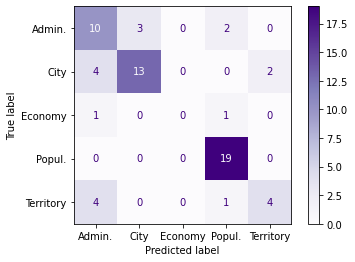

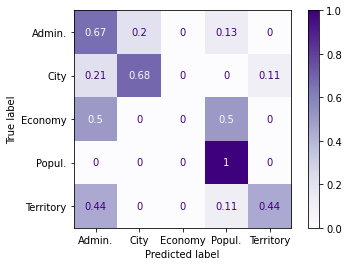

In [96]:
title = [("MLP Confusion Matrix", None),
         ("MLP Normalized Confusion Matrix", 'true')]
class_names = ['Admin.', 'City', 'Economy','Popul.', 'Territory']
for title, normalize in title:
  cm = confusion_matrix(y_test, predictions, normalize = normalize)
  cmd = ConfusionMatrixDisplay(cm, display_labels= ['Admin.', 'City', 'Economy','Popul.', 'Territory'])
  cmd.plot(cmap = plt.cm.Purples)

# Multi-Layer Perceptron (MLP)



---


In [97]:
X_train = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_train.csv")
y_train = X_train["class"]

X_test = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_test.csv")
y_test = X_test["class"]

X_train.drop("class", axis=1, inplace=True)
X_train.replace([-np.inf, np.inf], 2**30, inplace = True)
X_test.drop("class", axis=1, inplace=True)
X_test.replace([-np.inf, np.inf], 2**30, inplace = True)

print(X_train.shape)

(255, 138)


In [98]:
model_MLP = MLPClassifier(max_iter=1000, hidden_layer_sizes = (45,), random_state = 2, activation = 'tanh', alpha = 0.01)

In [99]:
pipe = make_pipeline(preprocessing.StandardScaler(), model_MLP)
pipe.fit(X_train, y_train)  # apply scaling on training data
print("TRAIN: ", str(pipe.score(X_train, y_train)))
print("TEST: ", str(pipe.score(X_test, y_test)))

TRAIN:  0.984313725490196
TEST:  0.765625


In [100]:
predictions = pipe.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 5, 5, 2, 2, 2, 2, 2, 2, 4, 5, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 5, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 1, 5, 4, 5, 5, 5, 4, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]


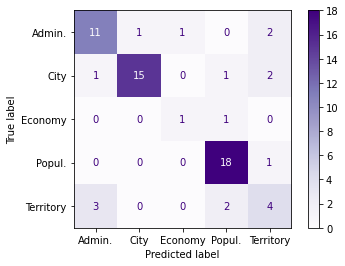

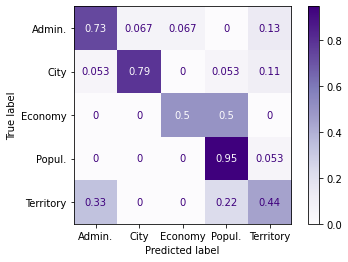

In [101]:
title = [("MLP Confusion Matrix", None),
         ("MLP Normalized Confusion Matrix", 'true')]
class_names = ['Admin.', 'City', 'Economy','Popul.', 'Territory']
for title, normalize in title:
  cm = confusion_matrix(y_test, predictions, normalize = normalize)
  cmd = ConfusionMatrixDisplay(cm, display_labels= ['Admin.', 'City', 'Economy','Popul.', 'Territory'])
  cmd.plot(cmap = plt.cm.Purples)

# Neural Network


---



In [ ]:
X_b = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_train.csv")
y_b = X_b["class"]

X_b_test = pd.read_csv("/content/drive/MyDrive/TFG/Input models/agg_profiles_test.csv")
y_b_test = X_b_test["class"]

X_b.drop("class", axis=1, inplace=True)
X_b.replace([-np.inf, np.inf], 2**30, inplace = True)
X_b_test.drop("class", axis=1, inplace=True)
X_b_test.replace([-np.inf, np.inf], 2**30, inplace = True)

scalar_b = preprocessing.StandardScaler().fit(X_b)

X_b_train_scaled = scalar_b.transform(X_b)
X_b_train_scaled = np.hstack((X_b_train_scaled, np.array(y_b).reshape((len(y_b),1))))

X_b_test_scaled = scalar_b.transform(X_b_test)
X_b_test_scaled = np.hstack((X_b_test_scaled, np.array(y_b_test).reshape((len(y_b_test),1))))

X_tensor = torch.FloatTensor(X_b_train_scaled)
X_tensor_test = torch.FloatTensor(X_b_test_scaled)

dataset_train=TensorDataset(X_tensor)
train_loader = DataLoader(dataset_train,batch_size=8, shuffle=True)

dataset_test=TensorDataset(X_tensor_test)
test_loader = DataLoader(dataset_test,batch_size=8, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Linear(138, 32),
    nn.Sigmoid(),
    nn.Dropout(0.25),
    nn.Linear(32, 32),
    nn.Sigmoid(),
    nn.Dropout(0.25),
    nn.Linear(32,5)
)

a = torch.randn(8,138)
model(torch.FloatTensor(a))

tensor([[ 0.1503, -0.6042, -0.7087, -0.4041, -0.0418],
        [ 0.0953, -0.1469, -0.4711, -0.2329, -0.1111],
        [ 0.0802, -0.1879, -0.6359, -0.4540, -0.3716],
        [-0.1804,  0.1264, -0.3689, -0.5101, -0.4790],
        [ 0.1057, -0.3756, -0.6080, -0.2566,  0.2265],
        [ 0.0523, -0.5000, -0.4435, -0.4957,  0.0877],
        [ 0.0476, -0.0577, -0.2002, -0.4833, -0.0462],
        [ 0.0761, -0.3082, -0.0692, -0.3803,  0.2606]],
       grad_fn=<AddmmBackward>)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 10
running_loss = 0
accuracy = 0
test_loss = 0
print_every = 10
train_losses = []
test_losses = []

In [ ]:
for epoch in range(epochs):
    steps = 0
    for idx,inputs in enumerate(train_loader):
        steps += 1
        labels = []
        for row in inputs[0].detach().numpy():
            labels.append(int(row[-1]) - 1)
        real_input = inputs[0].detach().numpy()[:,:-1]
        real_input = torch.FloatTensor(real_input)
        labels = torch.LongTensor(labels)

        optimizer.zero_grad()

        logps = model(real_input)

        top_p_train, top_class_train = logps.topk(1, dim=1)
        equals_train = top_class_train == labels.view(*top_class_train.shape)
        accuracy += torch.mean(equals_train.type(torch.FloatTensor)).item()

        loss = criterion(logps, labels)
        loss.backward()
        running_loss = loss.item()
        optimizer.step()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy_t = 0
            model.eval()
            with torch.no_grad():
                for _, inputs_test in enumerate(test_loader):
                    
                    labels_test = []
                    for row in inputs_test[0].detach().numpy():
                        labels_test.append(int(row[-1]) - 1)
                    real_input_test = inputs_test[0].detach().numpy()[:,:-1]
                    real_input_test = torch.FloatTensor(real_input_test)
                    labels_test = torch.LongTensor(labels_test)
                    
                    logps_t = model(real_input_test)
                    batch_loss = criterion(logps_t, labels_test)
                    test_loss += batch_loss.item()
                    
                    top_p, top_class = logps_t.topk(1, dim=1)
                    equals = top_class == labels_test.view(*top_class.shape)
                    accuracy_t += torch.mean(equals.type(torch.FloatTensor)).item()
        
            print(f"Epoch {epoch+1}/{epochs}.. "   
                  f"Train accuracy: {accuracy/len(dataset_train):.3f}.. "
                  f"Train loss: {running_loss:.3f}.. "
                  f"Test loss: {test_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy_t/len(test_loader):.3f}")

            running_loss = 0
            model.train()
        
        

Epoch 1/10.. Train accuracy: 0.009.. Train loss: 1.640.. Test loss: 1.418.. Test accuracy: 0.297
Epoch 1/10.. Train accuracy: 0.022.. Train loss: 1.042.. Test loss: 1.316.. Test accuracy: 0.500
Epoch 1/10.. Train accuracy: 0.040.. Train loss: 1.070.. Test loss: 1.232.. Test accuracy: 0.500
Epoch 2/10.. Train accuracy: 0.059.. Train loss: 1.415.. Test loss: 1.128.. Test accuracy: 0.578
Epoch 2/10.. Train accuracy: 0.078.. Train loss: 0.951.. Test loss: 1.057.. Test accuracy: 0.719
Epoch 2/10.. Train accuracy: 0.102.. Train loss: 0.832.. Test loss: 0.998.. Test accuracy: 0.703
Epoch 3/10.. Train accuracy: 0.132.. Train loss: 1.007.. Test loss: 0.952.. Test accuracy: 0.703
Epoch 3/10.. Train accuracy: 0.155.. Train loss: 0.911.. Test loss: 0.951.. Test accuracy: 0.703
Epoch 3/10.. Train accuracy: 0.181.. Train loss: 0.688.. Test loss: 0.905.. Test accuracy: 0.688
Epoch 4/10.. Train accuracy: 0.216.. Train loss: 0.777.. Test loss: 0.876.. Test accuracy: 0.688
Epoch 4/10.. Train accuracy: 0